In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('datasets/cbbAll.csv')

## Question 1

### Which conferences produce the best offenses and the best defenses each year?
 1. Which were the top five offensive and defensive conferences, year by year?
 2. Which were the top ten offensive and defensive conferences, out of all year by year results?
 3. Which were the top ten offensive and defensive conferences cumulatively?

#### 1. Year by year performance

In [19]:
years = df['YEAR'].unique()
df_yby = df.groupby(['YEAR', 'CONF']).mean()

In [83]:
os_list = []
ds_list = []
a = [1,2,3,4]

for year in years:
    os_list.append(df_yby[df_yby.index.get_level_values('YEAR') == year]['ADJOE'].nlargest(5))
    ds_list.append(df_yby[df_yby.index.get_level_values('YEAR') == year]['ADJDE'].nsmallest(5))
    
df_off = pd.concat([year.unstack(level=1) for year in os_list], axis=0)
df_def = pd.concat([year.unstack(level=1) for year in ds_list], axis=0)

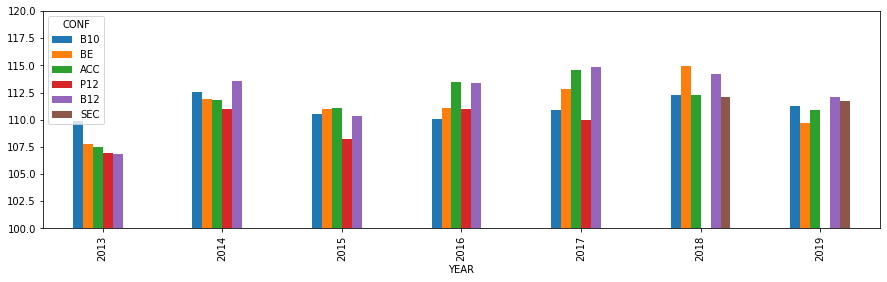

In [84]:
df_off.plot(y=[col for col in df_off.columns], kind='bar', figsize=(15,4), ylim=(100,120))
plt.show()

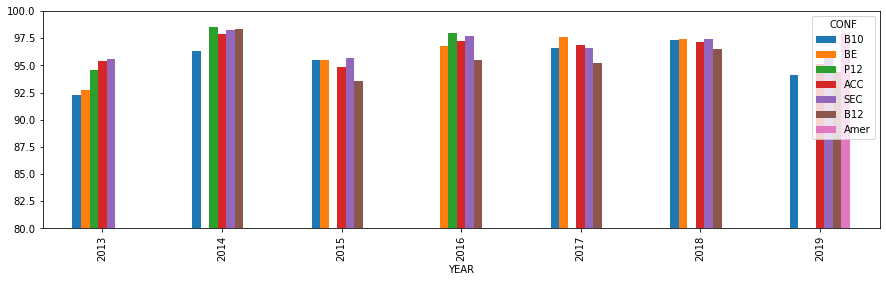

In [86]:
df_def.plot(y=[col for col in df_def.columns], kind='bar', figsize=(15,4), ylim=(80,100))
plt.show()

#### 2. Top single season performances

In [88]:
top_off_single = df_yby['ADJOE'].nlargest(10)
top_off_single

YEAR  CONF
2018  BE      114.920000
2017  B12     114.810000
      ACC     114.560000
2018  B12     114.210000
2014  B12     113.580000
2016  ACC     113.506667
      B12     113.420000
2017  BE      112.790000
2014  B10     112.575000
2018  ACC     112.273333
Name: ADJOE, dtype: float64

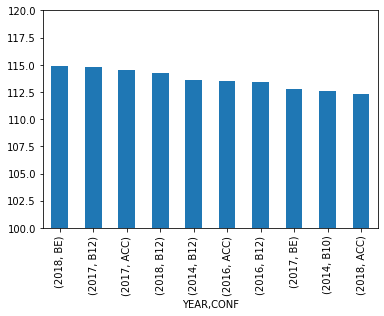

In [107]:
top_off_single.plot.bar(ylim=(100,120))
plt.show()

In [94]:
top_def_single = df_yby['ADJDE'].nsmallest(10)
top_def_single

YEAR  CONF
2013  B10     92.250000
      BE      92.686667
2015  B12     93.560000
2019  B10     94.114286
      B12     94.380000
2013  P12     94.550000
2015  ACC     94.826667
2019  ACC     95.140000
2017  B12     95.230000
2013  ACC     95.383333
Name: ADJDE, dtype: float64

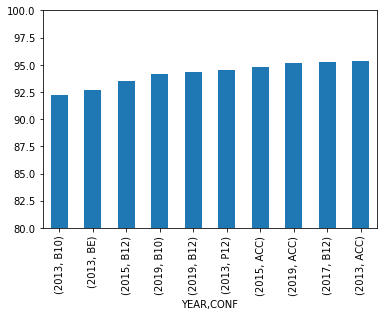

In [108]:
top_def_single.plot.bar(ylim=(80,100))
plt.show()

#### 3. Top cumulative performances

In [109]:
df_cum = df.groupby('CONF').mean()

top_off_cum = df_cum['ADJOE'].nlargest(10)
top_def_cum = df_cum['ADJDE'].nsmallest(10)

Top Offenses:
 CONF
B12     112.184286
ACC     111.776471
BE      111.068000
B10     111.055319
SEC     109.404082
P12     109.057143
Amer    106.541791
WCC     106.437681
A10     105.659596
MWC     105.153333
Name: ADJOE, dtype: float64


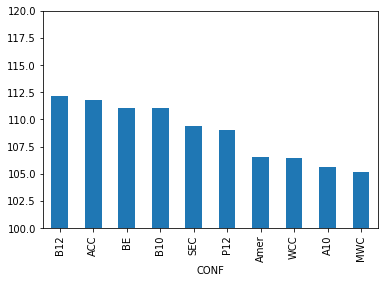

In [110]:
print("Top Offenses:\n", top_off_cum)
top_off_cum.plot.bar(ylim=(100,120))
plt.show()

Top Defenses:
 CONF
B12      95.584286
B10      95.886170
ACC      96.393137
BE       96.610667
SEC      96.762245
P12      98.389286
Amer     99.308955
A10     100.141414
MVC     100.370000
MWC     101.026667
Name: ADJDE, dtype: float64


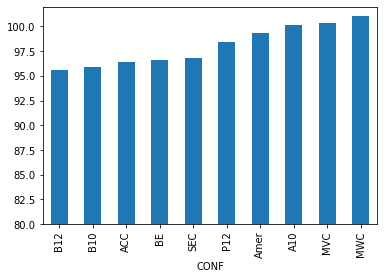

In [112]:
print("Top Defenses:\n", top_def_cum)
top_def_cum.plot.bar(ylim=(80,102))
plt.show()

## Question 2

### Is a team with a better offense or a better defense more likely to have the most wins?
 1. What is the correlation between offensive and defensive efficiency and in-season win percentage (`PRE_PC`)?
 2. What is the correlation between offensive and defensive efficiency and tournament performance (`PFPC`)?

#### 1. Team efficiency vs win percentage

##### Offense

In [2]:
season_off = np.corrcoef(df['ADJOE'], df['PRE_PC'])
season_off

array([[1.        , 0.71935103],
       [0.71935103, 1.        ]])

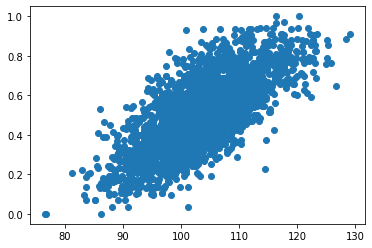

In [11]:
plt.scatter(df['ADJOE'], df['PRE_PC'])
plt.show()

##### Defense

In [8]:
season_def = np.corrcoef(df['ADJDE'], df['PRE_PC'])
season_def

array([[ 1.        , -0.65386466],
       [-0.65386466,  1.        ]])

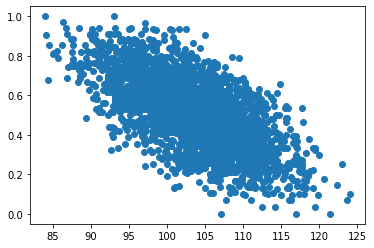

In [12]:
plt.scatter(df['ADJDE'], df['PRE_PC'])
plt.show()

##### Net

In [4]:
season_net = np.corrcoef([df['ADJOE']-df['ADJDE']], df['PRE_PC'])
season_net

array([[1.       , 0.7987837],
       [0.7987837, 1.       ]])

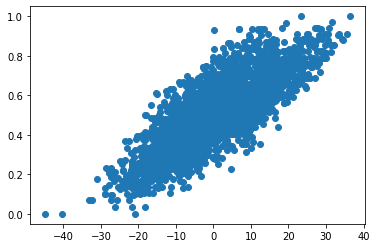

In [13]:
plt.scatter([df['ADJOE']-df['ADJDE']], df['PRE_PC'])
plt.show()

#### 2. Team efficiency vs postseason performance

##### Offense

In [6]:
post_off = np.corrcoef(df['ADJOE'], df['PFPC'])
post_off

array([[1.        , 0.56060972],
       [0.56060972, 1.        ]])

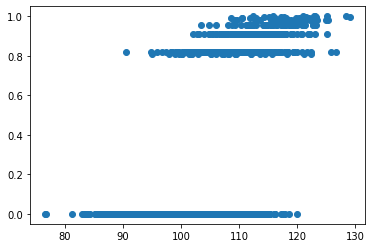

In [14]:
plt.scatter(df['ADJOE'], df['PFPC'])
plt.show()

##### Defense

In [7]:
post_def = np.corrcoef(df['ADJDE'], df['PFPC'])
post_def

array([[ 1.        , -0.50678327],
       [-0.50678327,  1.        ]])

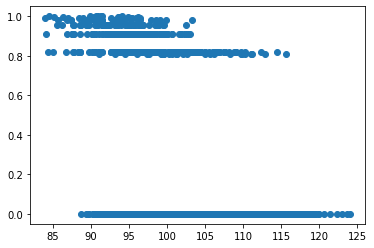

In [15]:
plt.scatter(df['ADJDE'], df['PFPC'])
plt.show()

##### Net

In [5]:
post_net = np.corrcoef([df['ADJOE']-df['ADJDE']], df['PFPC'])
post_net

array([[1.       , 0.6209838],
       [0.6209838, 1.       ]])

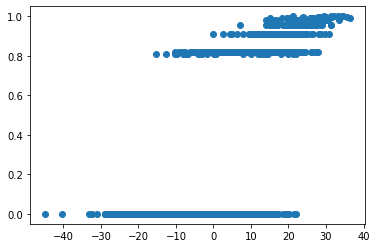

In [16]:
plt.scatter([df['ADJOE']-df['ADJDE']], df['PFPC'])
plt.show()

## Question 3

### Is there a bias toward the "Major" conferences (ACC, Big East, Big Ten, Big 12, Pac-12, SEC) in how the postseason tournament is seeded?
 1. Do non-major teams on average need to have a higher power ranking than major teams in order to earn a top-4 seed?
 2. Do non-major teams of comparable power ranking to major teams achieve comparable postseason success?  

If the answer is Yes to both questions, it would indicate a bias in favor of the major teams, since they earn better seeds despite equal performance



In [114]:
majors = ['ACC', 'BE', 'B10', 'B12', 'P12', 'SEC']

#### 1. Average power rankings of top-4 seeds

In [115]:
df_maj_t4 = df[(df['CONF'].isin(majors)) & (df['SEED'].isin([1,2,3,4]))]
df_nmj_t4 = df[~(df['CONF'].isin(majors)) & (df['SEED'].isin([1,2,3,4]))]

In [129]:
print("Average Power Ranking for top-4 seeds:")
print("\tMajor conference:\t", df_maj_t4['BARTHAG'].mean().round(4))
print("\tNon-major conference:\t", df_nmj_t4['BARTHAG'].mean().round(4))

print("\nAverage Offensive Effiency for top-4 seeds:")
print("\tMajor conference:\t", df_maj_t4['ADJOE'].mean().round(4))
print("\tNon-major conference:\t", df_nmj_t4['ADJOE'].mean().round(4))

print("\nAverage Defensive Efficiency for top-4 seeds:")
print("\tMajor conference:\t", df_maj_t4['ADJDE'].mean().round(4))
print("\tNon-major conference:\t", df_nmj_t4['ADJDE'].mean().round(4))


Average Power Ranking for top-4 seeds:
	Major conference:	 0.9364
	Non-major conference:	 0.9313

Average Offensive Effiency for top-4 seeds:
	Major conference:	 117.8929
	Non-major conference:	 115.7923

Average Defensive Efficiency for top-4 seeds:
	Major conference:	 92.601
	Non-major conference:	 91.1692


#### 2. Average postseason result of top-4 seeds

In [128]:
print("Average Postseason Performance Result for top-4 seeds:")
print("\tMajor conference:\t", df_maj_t4['PFPC'].mean().round(4))
print("\tNon-major conference:\t", df_nmj_t4['PFPC'].mean().round(4))

Average Postseason Performance Result for top-4 seeds:
	Major conference:	 0.9441
	Non-major conference:	 0.9285
